# Task 2: Prediction using Supervised Machine Learning
## Name: Prakash Kumar
### Objective: Preddict the percentage of marks  of an student based on the number of study hours.

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import dataset from remote location
u = 'http://bit.ly/w-data'
s_df = pd.read_csv(u)
print('Data Successfully imported')
#Print the first 5 records
s_df.head()

Data Successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Representation of Statistical data

s_df.describe()

We are now checking for the datatype of each column in this dataframe and also trying to find how much null values it contains,

In [6]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualizing data

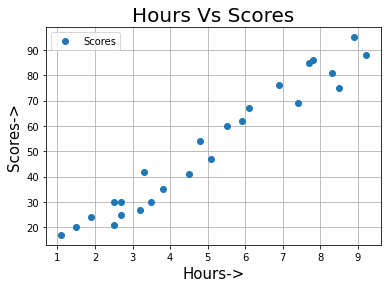

In [7]:
s_df.plot(x='Hours',y='Scores',style='o')
plt.ylabel('Scores->',fontsize=15)
plt.xlabel('Hours->',fontsize=15)
plt.title('Hours Vs Scores',fontsize=20)
plt.grid()
plt.show()

#### As from the above visualizations you see there is positive linear relationship as you study more the more you get the marks.

## Preparing Data and splitting into train and test sets

In [8]:
#divide the data into input and output features
X = s_df.iloc[:,:-1].values
y = s_df.iloc[:,1].values

Splitting the data into training and testing sets by train_test_split method from scikit learn.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Model

In [10]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print('Model Trained Successfully')

Model Trained Successfully


Plotting the Regression Line

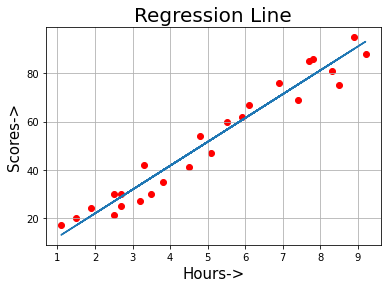

In [11]:
line = linear_model.coef_ * X + linear_model.intercept_
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.grid()
plt.ylabel('Scores->',fontsize=15)
plt.xlabel('Hours->',fontsize=15)
plt.title('Regression Line',fontsize=20)
plt.show()

Visualizing Training and Testing Sets

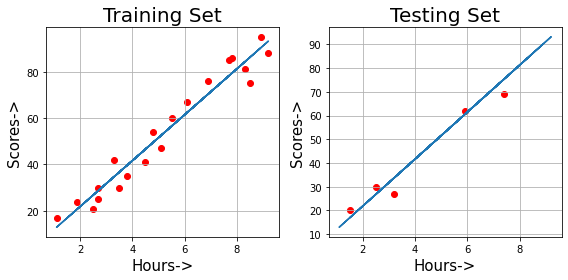

In [12]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

#Training Set

axes[0].plot(X,line)
axes[0].scatter(X_train,y_train,color='red')
axes[0].grid()
axes[0].set_xlabel('Hours->',fontsize=15)
axes[0].set_ylabel('Scores->',fontsize=15)
axes[0].set_title('Training Set',fontsize=20)

#Testing Set

axes[1].plot(X,line)
axes[1].scatter(X_test,y_test,color='red')
axes[1].grid()
axes[1].set_xlabel('Hours->',fontsize=15)
axes[1].set_ylabel('Scores->',fontsize=15)
axes[1].set_title('Testing Set',fontsize=20)
fig.tight_layout()

## Making Predictions

In [13]:
print(X_test) # Test data - In Hours
y_pred = linear_model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
print(y_pred)  # Predicted scores

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing actual Vs predicted scores

In [15]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Creating dataframe 
pred_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visualization for Actual Vs predicted values

[]

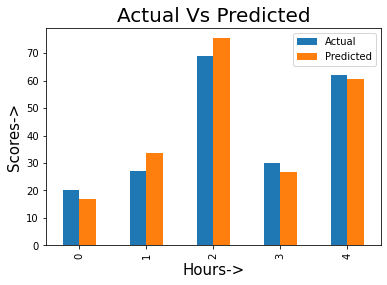

In [16]:
pred_df.plot(kind='bar')
plt.title('Actual Vs Predicted',fontsize=20)
plt.xlabel('Hours->',fontsize=15)
plt.ylabel('Scores->',fontsize=15)
plt.plot()

As per the above visualizations the actual and predicted value are closer to each other.

Predicted Score for student studying for 9.25 hours

In [17]:
hours = 9.25
own_pred = linear_model.predict([[hours]])
print("No of Hours : %f" %hours)
print("Predicted Score : %f" %own_pred)

No of Hours : 9.250000
Predicted Score : 93.691732


## Predicting Accuracy score for Linear Model

In [18]:
linear_model.score(X_train, y_train)  #Accuracy for training data

0.9515510725211552

In [19]:
linear_model.score(X_test, y_test)  #Accuracy for testing data

0.9454906892105354

## Evaluating the model

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


In [21]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.647447612100373


## Conclusion

If a Student studies for 9.25 hrs in a day then his prediced score is 93.69 percentage.